<a href="https://colab.research.google.com/github/mlengineer666/CODSOFT-/blob/main/Movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np


#                  **TEST DATA**





In [45]:
from io import StringIO


test_file = '/content/test_data.txt'

with open(test_file,'r',encoding='utf-8') as f:
  content = f.read()

try:
  df = pd.read_csv(StringIO(content),sep=None,engine='python')
except:
  print("\nNot detected as tabular/tab-separated file. Displaying raw text only.")


Not detected as tabular/tab-separated file. Displaying raw text only.


to show the actual data format because this file could not open with just pd.read_csv

In [46]:
!head -n 10 /content/test_data.txt


1 ::: Edgar's Lunch (1998) ::: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
2 ::: La guerra de papá (1977) ::: Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housema

In [47]:
df = pd.read_csv(test_file,sep=':::',engine='python',names=['ID','Year','Description'])
df.head()

,ID,Year,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [48]:

print(df.shape)
df.info()
print(df.isnull().sum())
df.notnull().sum()
df['Year'].describe()
# df['Year'].duplicated().sum()

(54200, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Year         54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
ID             0
Year           0
Description    0
dtype: int64


,Year
count,54200
unique,54200
top,Curitiba Zero Grau (2010)
freq,1


In [49]:
df.rename(columns={'Year':'Genre'},inplace=True)

In [50]:
df.sample(5)

,ID,Genre,Description
12991,12992,Reading Festival 2002 (2002),A 90 minute music special for ITV2 and 2 one ...
37127,37128,Ek Hans Ka Jora (1975),Anil and Tina are madly in love with each oth...
41412,41413,"Fala, Mulher! (2005)","Sao Paulo, 2003. Fifteen afro-descendant wome..."
24034,24035,Muriel ou le temps d'un retour (1963),"In the seacoast town of Boulogne, Hélčne sell..."
35717,35718,Bonding or: Penises Are Weapons of Mass Destr...,An exploration of the relationship between tw...


In [51]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [52]:
train_path = '/content/train_data.txt'

train_data = pd.read_csv(train_path,sep=':::',engine='python',names=['ID','Title','Genre','Description'])
train_data.sample(5)

,ID,Title,Genre,Description
1000,1001,Missionaries Mansion (2013),short,When the latest group of young adults come to...
7726,7727,2006 Globe WCT FIJI (2006),documentary,The 2006 Globe WCT Fiji witnessed Cloudbreak'...
7625,7626,The Dirt Merchants 'Romancery' (2017),short,"Spencer, an average small-time troublemaker i..."
52988,52989,"""Board Culture"" (2006)",reality-tv,Board Culture is a funny and realistic show e...
25456,25457,"Here's Looking at You, Kid (2013)",music,"In 2012, the jazz man Thomas De Pourquery was..."


In [53]:
train_data.shape
print(train_data.info())
print(train_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
ID             0
Title          0
Genre          0
Description    0
dtype: int64


In [54]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [55]:
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [56]:
train_data['Title'].str.split()

year = []

for i in train_data['Title'].str.split():
  year.append(i[-1])

year

['(2009)',
 '(1997)',
 '(1980)',
 '(1915)',
 '(2007)',
 '(2011)',
 '(2009)',
 '(1985)',
 '(2016)',
 '(2014/I)',
 '(2016)',
 '(1997)',
 '(2009)',
 '(1969)',
 '(1973)',
 '(2016)',
 '(2001)',
 '(2014)',
 '(2009)',
 '(2010)',
 '(2016)',
 '(1941)',
 '(1976)',
 '(2002)',
 '(1973)',
 '(????/I)',
 '(2004)',
 '(1963)',
 '(1994)',
 '(2007)',
 '(2018)',
 '(2015)',
 '(2002)',
 '(1973)',
 '(2006)',
 '(2015)',
 '(2013/I)',
 '(1966)',
 '(????)',
 '(2013)',
 '(2009)',
 '(2006)',
 '(2017)',
 '(1997)',
 '(????)',
 '(????)',
 '(2010)',
 '(1964)',
 '(1937)',
 '(????)',
 '(2004)',
 '(2016)',
 '(2011)',
 '(????)',
 '(2012)',
 '(2005)',
 '(2017)',
 '(2006)',
 '(1951)',
 '(1997)',
 '(2015/I)',
 '(1979)',
 '(2007)',
 '(1992)',
 '(2016)',
 '(1997)',
 '(2006)',
 '(2009)',
 '(2009)',
 '(1955)',
 '(2016)',
 '(2006)',
 '(1989)',
 '(2009)',
 '(2000)',
 '(2016)',
 '(2017)',
 '(1974)',
 '(1949)',
 '(1995/I)',
 '(2007)',
 '(2005)',
 '(2017)',
 '(2014)',
 '(1982)',
 '(2009)',
 '(2014)',
 '(2005)',
 '(2006)',
 '(1970/II)

In [57]:
train_data['Year'] = year
train_data.sample(5)

,ID,Title,Genre,Description,Year
6768,6769,The Highway of Hope (1917),western,Cast out by his father because of his wild sh...,(1917)
26321,26322,"""Becker - (Henning Becker)"" (????)",drama,"This is the story of Henning Becker (28), a D...",(????)
39788,39789,The Girl at Home (1917),drama,"Jean Padgate, a wealthy orphan is in love wit...",(1917)
23366,23367,Il mistero di Lovecraft - Road to L. (2005),thriller,1997: A student of folklore named Andrea Robe...,(2005)
7606,7607,Mor suit nam (2007),romance,Magic Boy is a beautiful youth romance set in...,(2007)


In [58]:
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/tmp/ipython-input-1675581875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data,y='Genre',order = train_data['Genre'].value_counts().index,palette='viridis')


Text(0.5, 1.0, 'Count of Genre')

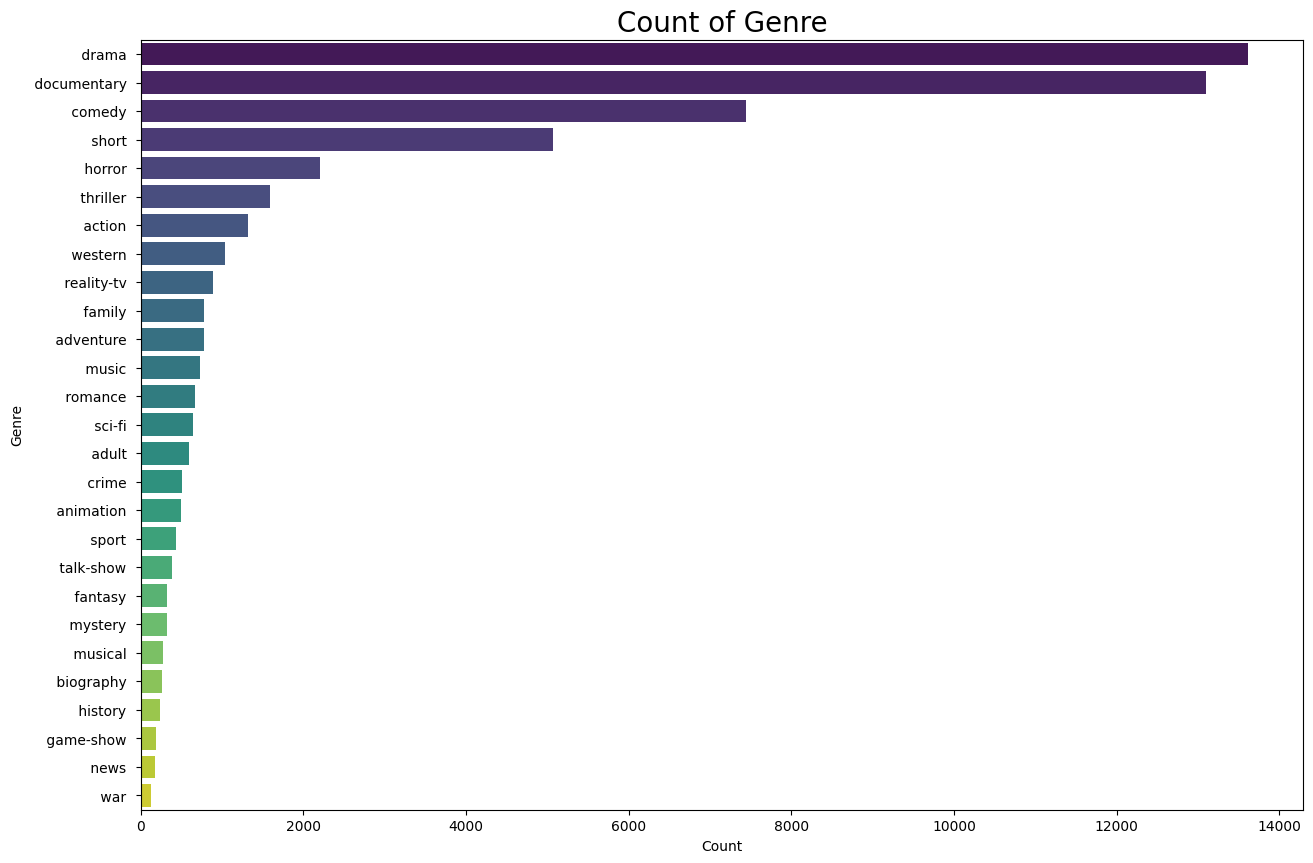

In [59]:
# Plot distribution of genre in train data
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,y='Genre',order = train_data['Genre'].value_counts().index,palette='viridis')

plt.xlabel('Count',fontsize=10)
plt.ylabel('Genre',fontsize=10)
plt.title('Count of Genre',fontsize=20)

Data Preprocessing and Text Cleaning

In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# ----> This function takes too much time to compute

# def transform_text(text):
#   #  convert into lower case
#   text = text.lower()

#   # tokenization
#   text = nltk.word_tokenize(text)

#   # remove special_characters
#   x = []
#   for i in text:
#     if i.isalnum():
#       x.append(i)

#   # remove stopwords
#   text = x[:]
#   x.clear()

#   for i in text:
#     if i not in stopwords.words('english') and i not in string.punctuation:
#       x.append(i)

#   # stemming
#   text = x[:]
#   x.clear()

#   for i in text:
#     x.append(ps.stem(i))

#   return " ".join(x)


def transform_text(text):
  text = text.lower()  # Lowercase all characters
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'http\S+', '',text)
  text = re.sub(r'pic. \S+', '',text)
  text = re.sub(r"[^a-zA-Z+']", ' ',text)
  text = re.sub(r's+[a-zA-z]\s+', ' ',text + ' ')
  text = "".join([i for i in text if i not in string.punctuation])

  words = nltk.word_tokenize(text)
  stopwords = nltk.corpus.stopwords.words('english')
  text = " ".join([i for i in words if i not in stopwords and len(i)>2 ])
  text = re.sub("\s[\s]+", " ",text).strip()

  return text



In [61]:
# E.g -->
transform_text(' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends POP CORN, Einstein, Bacon and childhood sweetheart Peggy Blue.')

'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking lady pink meets hospital stairs christmas approaches uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

In [62]:
train_data['Transform_text'] = train_data['Description'].apply(transform_text)

In [63]:
test_data = df

In [64]:
test_data.head()

,ID,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [65]:
test_data['Transform_text'] = test_data['Description'].apply(transform_text)

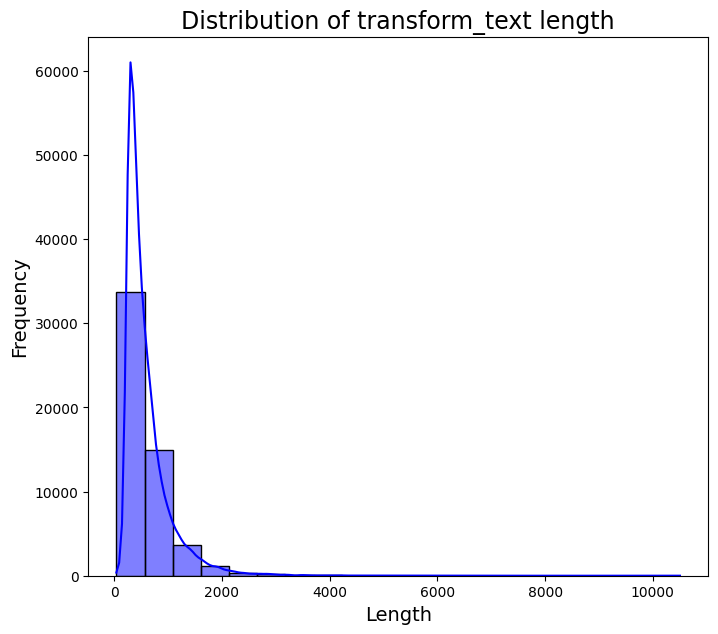

In [66]:
train_data['transform_text_length'] = train_data['Description'].apply(len)
test_data['transform_text_length'] = test_data['Description'].apply(len)

plt.figure(figsize=(8,7))
sns.histplot(data = train_data,x = 'transform_text_length',bins=20,kde=True,color='blue')
plt.xlabel('Length',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Distribution of transform_text length',fontsize=17)

plt.show()


In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score

In [68]:

# X_train = tfidf_vectorizer.fit_transform(train_data['Transform_text'])
# X_test = tfidf_vectorizer.transform(test_data['Transform_text'])

In [69]:

X_train,X_test,y_train,y_test = train_test_split(train_data['Transform_text'],train_data['Genre'],test_size=0.2,random_state=42,stratify=train_data['Genre'])
tfidf = TfidfVectorizer(max_features=50000,stop_words='english',ngram_range=(1,2),min_df=2,max_df=0.9,sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [71]:
# ---> Create the objects of each model

lr = LogisticRegression(class_weight='balanced',max_iter=2500)
lsv = LinearSVC(class_weight='balanced',max_iter=5000)
lsv_grid = GridSearchCV(LinearSVC(),param_grid={'C':[0.1,1,10]},cv=5,n_jobs=-1,verbose=1,scoring='accuracy')
mb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [72]:
pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(max_features=50000,stop_words='english',ngram_range=(1,2),min_df=2,max_df=0.9,sublinear_tf=True)),('lsv',LinearSVC())
])


param_grid = {
    'tfidf__ngram_range':[(1,1),(1,2),(1,3)],
    'tfidf__max_features':[1000,5000,10000,25000,50000],
    'tfidf__sublinear_tf':[True,False],
    'lsv__C':[0.1,1,10],
    'lsv__class_weight':['balanced',None]

  }

grid = GridSearchCV(pipeline,param_grid,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')
grid.fit(train_data['Transform_text'],train_data['Genre'])

from sklearn.metrics import classification_report
y_pred = grid.best_estimator_.predict(test_data['Transform_text'])
print(classification_report(test_data['Genre'],y_pred))




Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

In [73]:
model_dict = {
    'LSVC':lsv,
    'LSVC_grid':lsv,
    'LR':lr,
    'DT':dtc,
    # 'KNC':knc,
    'MNB':mb,
    'RFC':rfc,
    # 'ABC':abc,
    # 'BC':bc,
    # 'ETC':etc,
    # 'GBDT':gbdt,
    # 'XGB':xgb
}



In [74]:
def train_classifier(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred,average='weighted',zero_division=0)
  f1 = f1_score(y_test,y_pred,average='weighted',zero_division=0)
  return accuracy,precision,f1

In [75]:
accuracy_scores = []
precision_scores = []
f1_scores = []


for name,model in model_dict.items():
  accuracy,precision,f1 = train_classifier(model,X_train_tfidf,X_test_tfidf,y_train,y_test)
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  f1_scores.append(f1)




In [77]:
model_dataframe = pd.DataFrame({
    'Model':model_dict.keys(),
    'Accuracy':accuracy_scores,
    'Precision':precision_scores,
    'F1_Score':f1_scores
})

display(model_dataframe)


,Model,Accuracy,Precision,F1_Score
0,LSVC,0.562114,0.569701,0.562552
1,LSVC_grid,0.562114,0.569701,0.562552
2,LR,0.510836,0.584268,0.528939
3,DT,0.362077,0.386157,0.280368
4,MNB,0.468689,0.481452,0.346419
5,RFC,0.487135,0.544978,0.401247


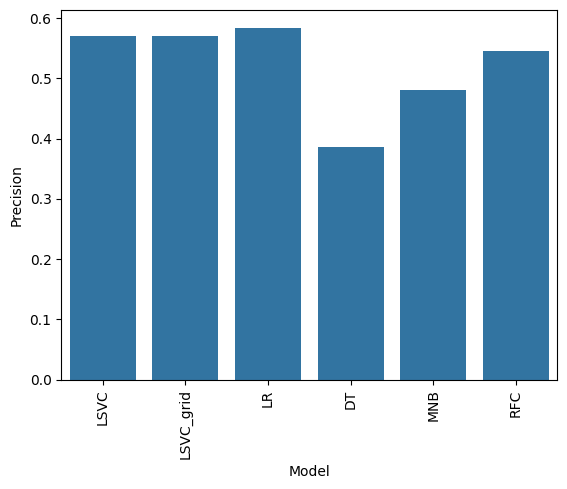

In [78]:

sns.barplot(x='Model',y='Precision',data=model_dataframe)
plt.xticks(rotation='vertical')
plt.show()
